# Problem
Using the dataset of weather conditions, predict if it will rain tomorrow.    
That is, 'RainTomorrow' == 'YES'

## Hypothesis
Main Predictor variables could be:
- 'RainToday'
- 'Humidity'
- 'Rainfall'

# Importing Dataset

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"../dataset/weather_train.csv")

In [4]:
# Removing unlabelled column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df.shape

(130914, 23)

In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1348
MaxTemp           1139
Rainfall          2938
Evaporation      56448
Sunshine         62830
WindGustDir       9289
WindGustSpeed     9232
WindDir9am        9479
WindDir3pm        3773
WindSpeed9am      1592
WindSpeed3pm      2727
Humidity9am       2396
Humidity3pm       4026
Pressure9am      13563
Pressure3pm      13523
Cloud9am         50241
Cloud3pm         53349
Temp9am           1599
Temp3pm           3226
RainToday         2938
RainTomorrow      2939
dtype: int64

Dataset has many rows with null values. Since the dataset is large enough, we will remove the rows with null values.

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(50806, 23)

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2012-05-12,NorfolkIsland,16.1,22.1,2.4,4.2,8.7,S,31.0,SSW,...,70.0,70.0,1020.2,1018.2,2.0,3.0,19.9,20.3,Yes,No
2,2010-04-22,Portland,11.6,26.4,0.2,2.2,10.4,W,37.0,NNW,...,72.0,59.0,1018.4,1015.5,2.0,6.0,19.7,24.0,No,Yes
8,2010-01-06,Hobart,12.9,21.5,0.0,6.0,10.9,WNW,56.0,NNW,...,60.0,32.0,1013.8,1012.8,6.0,4.0,13.4,18.9,No,No
11,2014-12-06,Darwin,26.6,34.5,0.6,6.8,5.7,E,56.0,WNW,...,60.0,57.0,1008.7,1004.7,7.0,7.0,31.5,32.8,No,Yes
12,2016-03-25,Hobart,11.4,21.0,0.0,3.4,3.4,NNW,43.0,NNW,...,55.0,41.0,1013.9,1012.7,7.0,7.0,13.9,19.8,No,No


In [10]:
target = df['RainTomorrow']

In [11]:
target.value_counts()

No     39569
Yes    11237
Name: RainTomorrow, dtype: int64

In [12]:
#
print ('% It will rain tomorrow = {}%'.format(round(float(len(df[df['RainTomorrow'] == 'Yes'])) / len(df) * 100), 3))

% It will rain tomorrow = 22%


Larger Numbers of 'No' than 'Yes'. May require oversampling methods.

In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
# Checking Location variations
df['Location'].value_counts()

Darwin              2753
Perth               2735
Brisbane            2695
MelbourneAirport    2641
PerthAirport        2612
SydneyAirport       2592
Watsonia            2439
Mildura             2342
MountGambier        2226
NorfolkIsland       2224
Townsville          2203
Cairns              2191
WaggaWagga          2178
AliceSprings        1982
Nuriootpa           1836
Hobart              1727
Moree               1725
Melbourne           1719
Portland            1687
Woomera             1537
Sydney              1515
Sale                1479
CoffsHarbour        1265
Williamtown         1060
Canberra             969
Cobar                474
Name: Location, dtype: int64

In [16]:
sydney_areas = ['SydneyAirport', 'Sydney']

In [17]:
# Since we are interested in predicting if it will 'rain' tomorrow for a particular region,
# I will assume that we are interested in the weather for Sydney region.
df = df[df['Location'].isin(sydney_areas)]

In [18]:
df.Location.value_counts()

SydneyAirport    2592
Sydney           1515
Name: Location, dtype: int64

In [19]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# EDA & Preprocessing

## Convert categorical binary into numerical values

In [20]:
def convert_numeric(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [21]:
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: convert_numeric(x))

In [22]:
df['RainToday'] = df['RainToday'].apply(lambda x: convert_numeric(x))

## Correlations

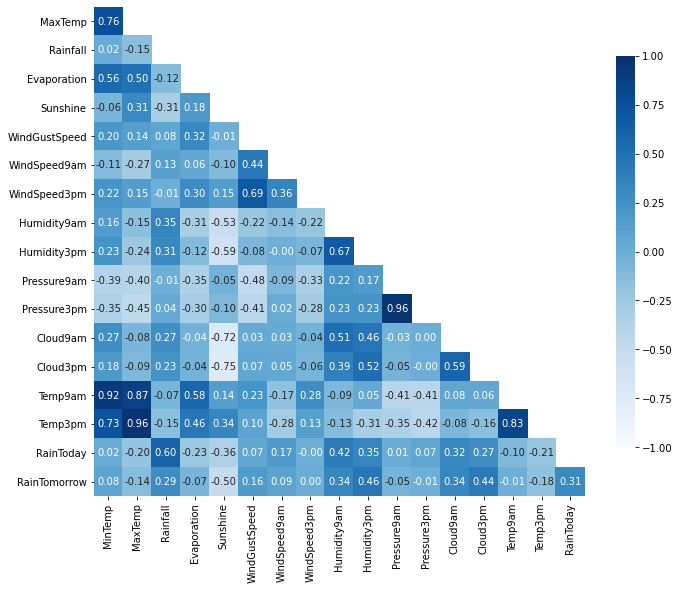

In [23]:
# Correlation Check
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(11, 9))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# yticks
plt.yticks(rotation=0)
plt.show()

Based on the heat map above, and with obvious reasons, we can observe high correlation between variables such as:
* 'Pressure3pm' vs 'Pressure9am'
* 'Cloud9am' vs 'Cloud3pm'
* 'Temp9am' vs 'Temp3pm'
* 'MaxTemp' vs 'MinTemp'
* 'MaxTemp' vs 'Temp3pm'
* 'MaxTemp' vs 'Temp9am'
* 'MinTemp' vs 'Temp3pm'
* 'MinTemp' vs 'Temp9am'
* 'Humidity3pm' vs 'Humidity9am'
* 'WindGustSpeed' vs 'WinSpeed3pm'
* 'Sunsine' vs 'Cloud'

For the purpose of our prediction, which is to predict if it will rain tomorrow, my hypothesis is:
- the later the information is, the more relevant it is for the percentage of raining tomorrow (3pm than 9am)
- the time specific information is more relevant than average 
- a relevant set of information should be grouped (e.g. 9am set vs 3pm set)
- 'Date' is not a meaningful factor for our prediction
- highly correlated features must not be included simultaneously (avoid multicollinearity)

In [24]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [25]:
features = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']

* 'WindGustSpeed' selected over 'WindSpeed3pm' because it was more correlated with our target variable.   
* As a set, 'WindGustDir' selected over 'WindDir3pm'.
* Since MaxTemp, MinTemp are highly correlated with 'Temp3pm', both are removed from the df.
* Since 'Cloud3pm' is highly correlated with 'Sunshine', 'Cloud3pm' is removed from the df.

In [26]:
df_selection = df[features]

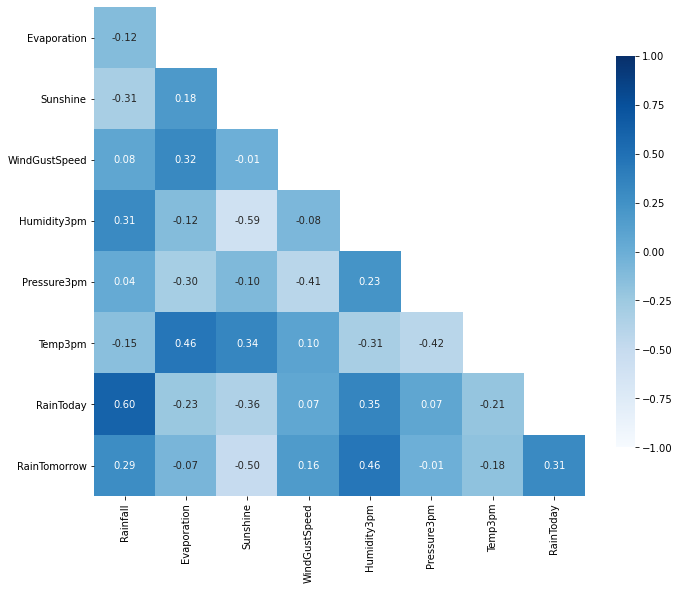

In [27]:
# Correlation Check 2
df_corr = df_selection.corr()

fig, ax = plt.subplots(figsize=(11, 9))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# yticks
plt.yticks(rotation=0)
plt.show()

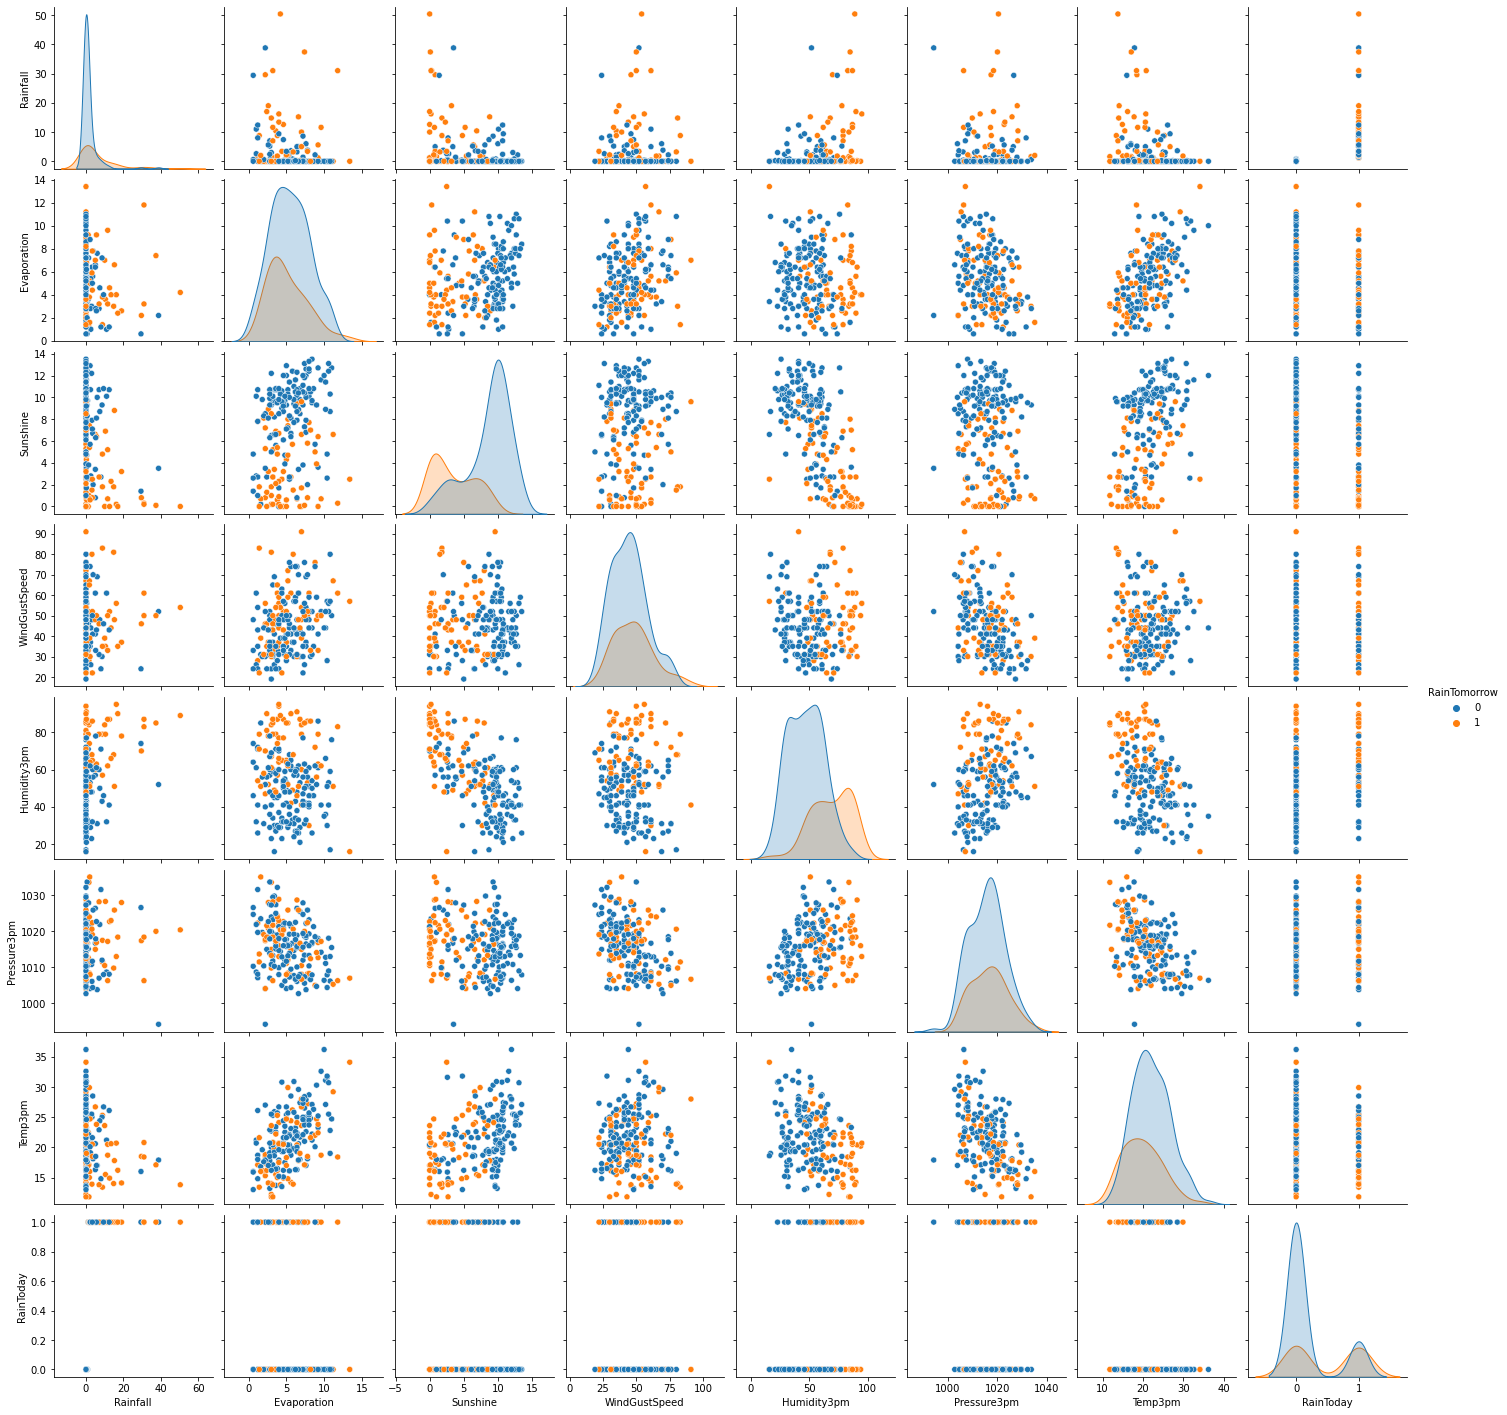

In [28]:
# take a 5% sample as this is computationally expensive
df_sample = df_selection.sample(frac=0.05)
# Pairwise plots
pplot = sns.pairplot(df_sample, hue="RainTomorrow")

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [110]:
X = df_selection.iloc[:,:-1]
y = df_selection.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## One-Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder 

In [64]:
X_train.dtypes

Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
Humidity3pm      float64
Pressure3pm      float64
Temp3pm          float64
RainToday          int64
dtype: object

In [123]:
enc_windDir = OneHotEncoder()
X_train_windDir = enc_windDir.fit_transform(X_train[['WindGustDir']])
X_test_windDir = enc_windDir.transform(X_test[['WindGustDir']])

In [124]:
enc_raintody = OneHotEncoder()
X_train_rainT = enc_raintody.fit_transform(X_train[['RainToday']])
X_teset_rainT = enc_raintody.transform(X_test[['RainToday']])

## Standardisation

In [113]:
numerical_feat = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']

In [175]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train_sc = sc.fit_transform(X_train[numerical_feat])

X_test_sc = sc.transform(X_test[numerical_feat])

In [149]:
from scipy import sparse

In [176]:
X_train_tr = sparse.hstack([X_train_sc, X_train_windDir, X_train_rainT])
X_test_tr = sparse.hstack([X_test_sc, X_test_windDir, X_teset_rainT])

## RandomOverSampling

In [165]:
from imblearn.over_sampling import RandomOverSampler

In [177]:
rand = RandomOverSampler(sampling_strategy='all')
X_sm, y_sm = rand.fit_resample(X_train_tr, y_train)

# Model Training and Performance

In [173]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [244]:
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn import metrics

## Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [302]:
logit_mod = LogisticRegression(random_state=0)
logit_mod.fit(X_sm, y_sm)
y_pred = logit_mod.predict(X_test_tr)
y_prob = logit_mod.predict_proba(X_test_tr)[:, 1]

In [303]:
# Accuracy
logit_accuracy = round(accuracy_score(y_test, y_pred),4)
print("Accuracy:", logit_accuracy)

# Precision
logit_precision = round(precision_score(y_test, y_pred),4)
print("Precision:", logit_precision)

# Recall
logit_recall = round(recall_score(y_test, y_pred),4)
print("Recall:", logit_recall)

# f1_score
logit_f1 = round(f1_score(y_test, y_pred),4)
print("F1-score:", logit_f1)

# ROC_AUC
logit_auc = round(roc_auc_score(y_test, y_prob),4)
print("ROC AUC:", logit_auc)

# cv
logit_cv_scores = cross_val_score(LogisticRegression(random_state=0), X_test_tr, y_test, scoring='accuracy', cv=10)
logit_cv_mean = round(np.mean(logit_cv_scores),4)
print("CV mean:", logit_cv_mean)

Accuracy: 0.792
Precision: 0.5778
Recall: 0.7386
F1-score: 0.6484
ROC AUC: 0.8445
CV mean: 0.8098


## Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [304]:
dt_mod = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_mod.fit(X_sm, y_sm)
y_pred2 = dt_mod.predict(X_test_tr)
y_prob2 = dt_mod.predict_proba(X_test_tr)[:, 1]

In [305]:
# Accuracy
dt_accuracy = round(accuracy_score(y_test, y_pred2),4)
print("Accuracy:", dt_accuracy)

# Precision
dt_precision = round(precision_score(y_test, y_pred2),4)
print("Precision:", dt_precision)

# Recall
dt_recall = round(recall_score(y_test, y_pred2),4)
print("Recall:", dt_recall)

# f1_score
dt_f1 = round(f1_score(y_test, y_pred2),4)
print("F1-score:", dt_f1)

# ROC_AUC
dt_auc = round(roc_auc_score(y_test, y_prob2),4)
print("ROC AUC:", dt_auc)

# cv
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=0), X_test_tr, y_test, scoring='accuracy', cv=10)
dt_cv_mean = round(np.mean(dt_cv_scores),4)
print("CV mean:", dt_cv_mean)

Accuracy: 0.8046
Precision: 0.6426
Recall: 0.5568
F1-score: 0.5967
ROC AUC: 0.8072
CV mean: 0.7891


## Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
rf_mod = RandomForestClassifier(random_state=0)  
rf_mod.fit(X_sm, y_sm)
y_pred3 = rf_mod.predict(X_test_tr)
y_prob3 = rf_mod.predict_proba(X_test_tr)[:, 1]

In [307]:
# Accuracy
rf_accuracy = round(accuracy_score(y_test, y_pred3),4)
print("Accuracy:", rf_accuracy)

# Precision
rf_precision = round(precision_score(y_test, y_pred3),4)
print("Precision:", rf_precision)

# Recall
rf_recall = round(recall_score(y_test, y_pred3),4)
print("Recall:", rf_recall)

# f1_score
rf_f1 = round(f1_score(y_test, y_pred3),4)
print("F1-score:", rf_f1)

# ROC_AUC
rf_auc = round(roc_auc_score(y_test, y_prob3),4)
print("ROC AUC:", rf_auc)

# cv
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=0), X_test_tr, y_test, scoring='accuracy', cv=10)
rf_cv_mean = round(np.mean(rf_cv_scores),4)
print("CV mean:", rf_cv_mean)

Accuracy: 0.8304
Precision: 0.6981
Recall: 0.6108
F1-score: 0.6515
ROC AUC: 0.8595
CV mean: 0.8046


## Support Vector Machine

In [94]:
from sklearn.svm import SVC

In [308]:
svm_mod= SVC(probability=True, random_state=0)
svm_mod.fit(X_sm, y_sm)
y_pred4 = svm_mod.predict(X_test_tr)
y_prob4 = svm_mod.predict_proba(X_test_tr)[:, 1]

In [309]:
# Accuracy
svm_accuracy = round(accuracy_score(y_test, y_pred4),4)
print("Accuracy:", svm_accuracy)

# Precision
svm_precision = round(precision_score(y_test, y_pred4),4)
print("Precision:", svm_precision)

# Recall
svm_recall = round(recall_score(y_test, y_pred4),4)
print("Recall:", svm_recall)

# f1_score
svm_f1 = round(f1_score(y_test, y_pred4),4)
print("F1-score:", svm_f1)

# ROC_AUC
svm_auc = round(roc_auc_score(y_test, y_prob4),4)
print("ROC AUC:", svm_auc)

# cv
svm_cv_scores = cross_val_score(SVC(probability=True, random_state=0), X_test_tr, y_test, scoring='accuracy', cv=10)
svm_cv_mean = round(np.mean(svm_cv_scores),4)
print("CV mean:", svm_cv_mean)

Accuracy: 0.7861
Precision: 0.5692
Recall: 0.7244
F1-score: 0.6375
ROC AUC: 0.8518
CV mean: 0.7987


## KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier

In [310]:
knn_mod = KNeighborsClassifier(n_neighbors=3)
knn_mod.fit(X_sm, y_sm)
y_pred5 = knn_mod.predict(X_test_tr)
y_prob5 = knn_mod.predict_proba(X_test_tr)[:, 1]

In [311]:
# Accuracy
knn_accuracy = round(accuracy_score(y_test, y_pred5),4)
print("Accuracy:", knn_accuracy)

# Precision
knn_precision = round(precision_score(y_test, y_pred5),4)
print("Precision:", knn_precision)

# Recall
knn_recall = round(recall_score(y_test, y_pred5),4)
print("Recall:", knn_recall)

# f1_score
knn_f1 = round(f1_score(y_test, y_pred5),4)
print("F1-score:", knn_f1)

# ROC_AUC
knn_auc = round(roc_auc_score(y_test, y_prob5),4)
print("ROC AUC:", knn_auc)

# cv
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_test_tr, y_test, scoring='accuracy', cv=10)
knn_cv_mean = round(np.mean(knn_cv_scores),4)
print("CV mean:", knn_cv_mean)

Accuracy: 0.7434
Precision: 0.5045
Recall: 0.642
F1-score: 0.565
ROC AUC: 0.7621
CV mean: 0.7759


## Two-class Bayes

In [238]:
from sklearn.naive_bayes import GaussianNB

In [312]:
gaussian = GaussianNB()
gaussian.fit(X_sm.todense(), y_sm)
y_pred6 = gaussian.predict(X_test_tr.todense())
y_prob6 = gaussian.predict_proba(X_test_tr.todense())[:, 1]

In [313]:
# Accuracy
gnb_accuracy = round(accuracy_score(y_test, y_pred6),4)
print("Accuracy:", gnb_accuracy)

# Precision
gnb_precision = round(precision_score(y_test, y_pred6),4)
print("Precision:", gnb_precision)

# Recall
gnb_recall = round(recall_score(y_test, y_pred6),4)
print("Recall:", gnb_recall)

# f1_score
gnb_f1 = round(f1_score(y_test, y_pred6),4)
print("F1-score:", gnb_f1)

# ROC_AUC
gnb_auc = round(roc_auc_score(y_test, y_prob6),4)
print("ROC AUC:", gnb_auc)

# cv
gnb_cv_scores = cross_val_score(GaussianNB(), X_test_tr.todense(), y_test, scoring='accuracy', cv=10)
gnb_cv_mean = round(np.mean(gnb_cv_scores),4)
print("CV mean:", gnb_cv_mean)

Accuracy: 0.7345
Precision: 0.4913
Recall: 0.6392
F1-score: 0.5556
ROC AUC: 0.7564
CV mean: 0.722


# Optimal Model

In [314]:
# Model comparison
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'rf', 'SVM', 'kNN', 'Bayes'],
  'Accuracy' : [logit_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy],
  'Precision': [logit_precision, dt_precision, rf_precision, svm_precision, knn_precision, gnb_precision],
  'Recall' : [logit_recall, dt_recall, rf_recall, svm_recall, knn_recall, gnb_recall],
  'F1' : [logit_f1, dt_f1, rf_f1, svm_f1, knn_f1, gnb_f1],
  'ROC_AUC': [logit_auc, dt_auc, rf_auc, svm_auc, knn_auc, gnb_auc],
  'CV_accuracy' : [logit_cv_mean, dt_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, gnb_cv_mean]
})

In [317]:
# Print table and sort by test precision
models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,CV_accuracy
2,rf,0.8304,0.6981,0.6108,0.6515,0.8595,0.8046
1,d.Tree,0.8046,0.6426,0.5568,0.5967,0.8072,0.7891
0,Logistic,0.7920,0.5778,0.7386,0.6484,0.8445,0.8098
3,SVM,0.7861,0.5692,0.7244,0.6375,0.8518,0.7987
4,kNN,0.7434,0.5045,0.6420,0.5650,0.7621,0.7759
5,Bayes,0.7345,0.4913,0.6392,0.5556,0.7564,0.7220


In [318]:
# Print table and sort by test Recall
models.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,CV_accuracy
0,Logistic,0.7920,0.5778,0.7386,0.6484,0.8445,0.8098
3,SVM,0.7861,0.5692,0.7244,0.6375,0.8518,0.7987
4,kNN,0.7434,0.5045,0.6420,0.5650,0.7621,0.7759
5,Bayes,0.7345,0.4913,0.6392,0.5556,0.7564,0.7220
2,rf,0.8304,0.6981,0.6108,0.6515,0.8595,0.8046
1,d.Tree,0.8046,0.6426,0.5568,0.5967,0.8072,0.7891


In [319]:
# Print table and sort by test F1-score
models.sort_values(by='F1', ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,CV_accuracy
2,rf,0.8304,0.6981,0.6108,0.6515,0.8595,0.8046
0,Logistic,0.7920,0.5778,0.7386,0.6484,0.8445,0.8098
3,SVM,0.7861,0.5692,0.7244,0.6375,0.8518,0.7987
1,d.Tree,0.8046,0.6426,0.5568,0.5967,0.8072,0.7891
4,kNN,0.7434,0.5045,0.6420,0.5650,0.7621,0.7759
5,Bayes,0.7345,0.4913,0.6392,0.5556,0.7564,0.7220


In [321]:
# Print table and sort by test CV_accuracy
models.sort_values(by='CV_accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,CV_accuracy
0,Logistic,0.7920,0.5778,0.7386,0.6484,0.8445,0.8098
2,rf,0.8304,0.6981,0.6108,0.6515,0.8595,0.8046
3,SVM,0.7861,0.5692,0.7244,0.6375,0.8518,0.7987
1,d.Tree,0.8046,0.6426,0.5568,0.5967,0.8072,0.7891
4,kNN,0.7434,0.5045,0.6420,0.5650,0.7621,0.7759
5,Bayes,0.7345,0.4913,0.6392,0.5556,0.7564,0.7220


In [322]:
# Print table and sort by test ROC_AUC
models.sort_values(by='ROC_AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,CV_accuracy
2,rf,0.8304,0.6981,0.6108,0.6515,0.8595,0.8046
3,SVM,0.7861,0.5692,0.7244,0.6375,0.8518,0.7987
0,Logistic,0.7920,0.5778,0.7386,0.6484,0.8445,0.8098
1,d.Tree,0.8046,0.6426,0.5568,0.5967,0.8072,0.7891
4,kNN,0.7434,0.5045,0.6420,0.5650,0.7621,0.7759
5,Bayes,0.7345,0.4913,0.6392,0.5556,0.7564,0.7220


# Prediction

Based on 'ROC_AUC', 'F1_score' and 'CV_accuracy', we will select __random_forest_classifier__ as the final model to predict whether if it will rain tomorrow in Sydney region.

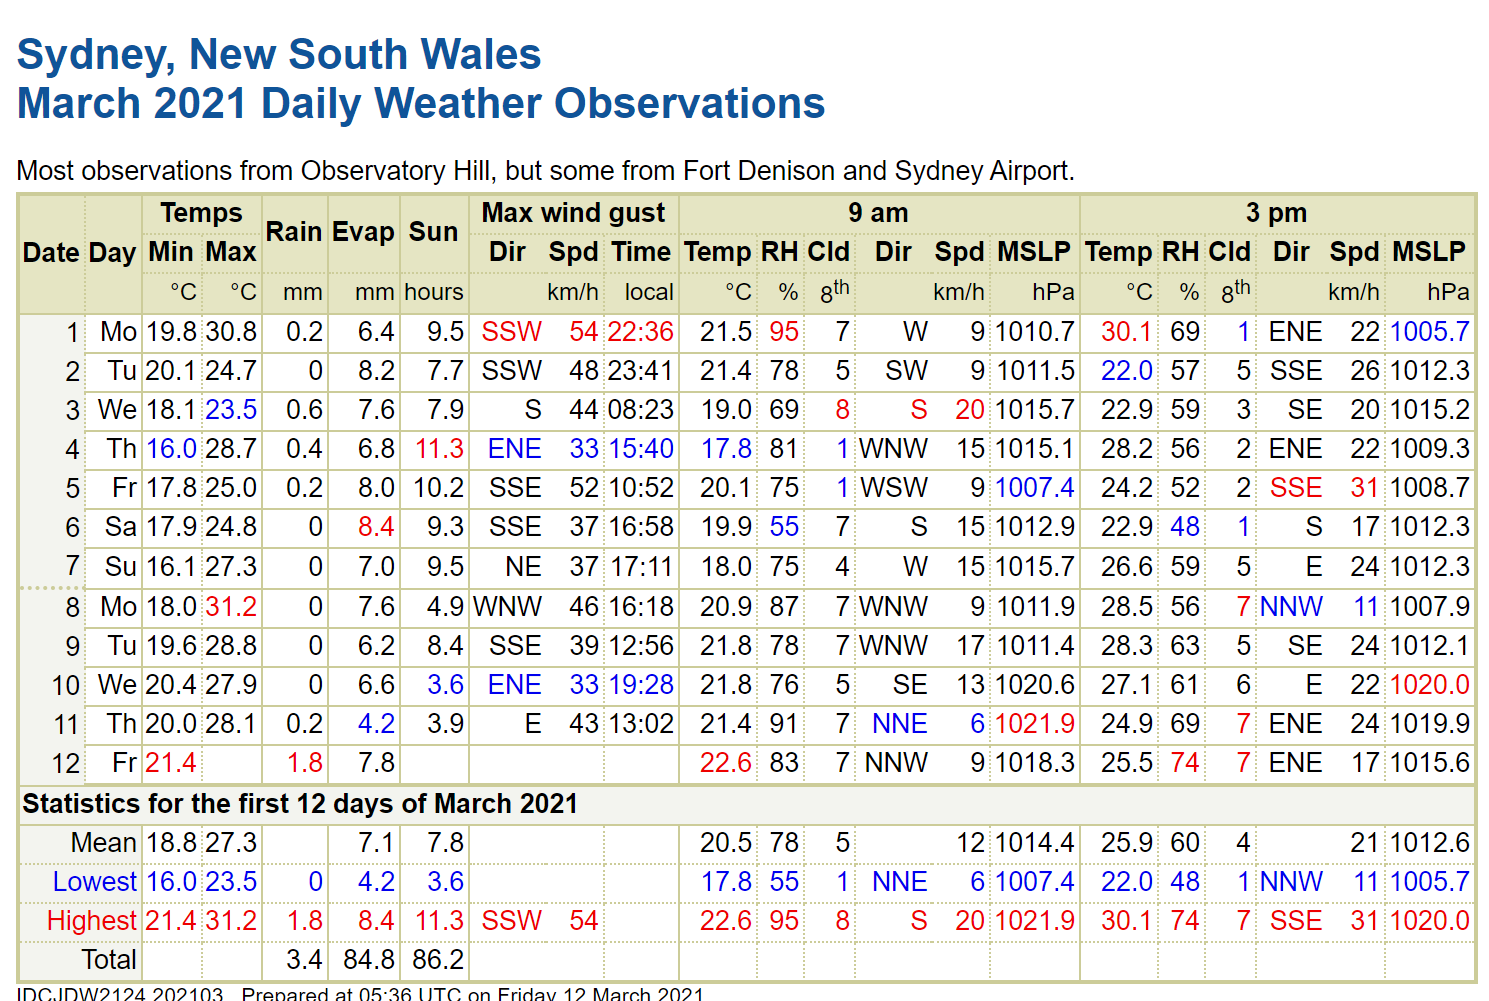

In [335]:
from IPython.display import Image
Image("../dataset/img/weather_MAR.PNG", height=700, width=800)

In [336]:
df_selection.columns

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'Humidity3pm', 'Pressure3pm', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Based on the data in 11th March 2021,
* Rainfall = 0.2
* Evaporation = 4.2
* Sunshine = 3.9
* WindGustDir = 'E'
* WindGustSpeed = 43
* Humidity3pm = 69
* Pressure3pm = 1019.9
* Temp3pm = 24.9
* RainToday = 1

In [341]:
X_today = pd.DataFrame({
    'Rainfall': [0.2],
    'Evaporation': [4.2],
    'Sunshine': [3.9],
    'WindGustDir': ['E'],
    'WindGustSpeed': [43],
    'Humidity3pm': [69],
    'Pressure3pm': [1019.9],
    'Temp3pm': [24.9],
    'RainToday': [1]
})

In [342]:
X_today

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday
0,0.2,4.2,3.9,E,43,69,1019.9,24.9,1


In [343]:
X_today_windDir = enc_windDir.transform(X_today[['WindGustDir']])

In [344]:
X_today_rainT = enc_raintody.transform(X_today[['RainToday']])

In [345]:
X_today_sc = sc.transform(X_today[numerical_feat])

In [346]:
X_today_tr = sparse.hstack([X_today_sc, X_today_windDir, X_today_rainT])

In [348]:
y_pred_today = rf_mod.predict(X_today_tr)

In [353]:
if y_pred_today[0] == 1:
    result = 'rain'
else:
    result = 'NOT rain'

In [356]:
print("According to the Random Forest Classifier trained with weather data in Sydney region,")
print(f"it is supposed to {result} tomorrow, which is the 12th of March.")

According to the Random Forest Classifier trained with weather data in Sydney region,
it is supposed to rain tomorrow, which is the 12th of March.
